# project_style_py example

## Configure environment

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import project_style_py as scp

Successfully loaded palettes from: /ssu/gassu/GAU_tools/project_style_py/.venv/lib/python3.12/site-packages/project_style_py/resources/palettes.yaml
Successfully loaded themes from: /ssu/gassu/GAU_tools/project_style_py/.venv/lib/python3.12/site-packages/project_style_py/resources/themes.yaml


## Generate demo data

In [2]:
np.random.seed(42)
data = {
    "flipper_length_mm": np.random.rand(100) * 200,
    "bill_length_mm": np.random.rand(100) * 100,
    "species": np.random.choice(["Adelie", "Chinstrap", "Gentoo"], 100)
}
penguins = pd.DataFrame(data)

## Show available palettes or themes

In [3]:
print(scp.available_themes())

default, publication


In [4]:
print(scp.available_palettes())

default, vibrant, npg, npg_continuous, scanpy_default


## Show colors in available palette

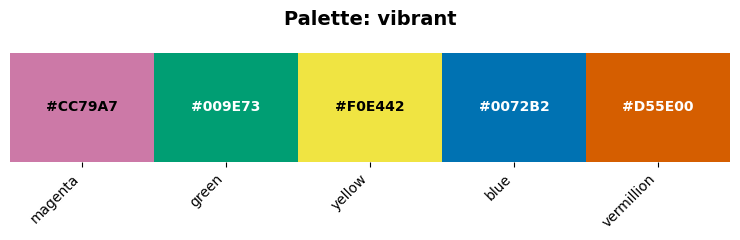

In [3]:
scp.display_project_palette("vibrant")

## Plot with no styling

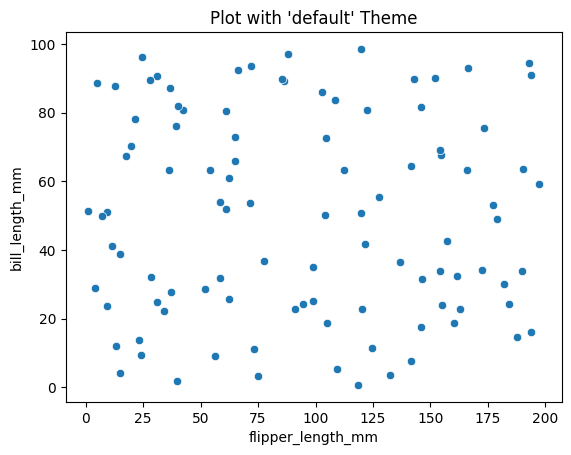

In [4]:
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm")
plt.title("Plot with 'default' Theme")
plt.show()

## Add project style

In [5]:
# Apply one of the pre-loaded themes
# Any graphical parameter can be overrided by providing it directly as a dictionary expanded
scp.set_project_style("publication", **{'axes.labelsize': 14})

Project style 'publication' applied. Continuous colormaps registered.


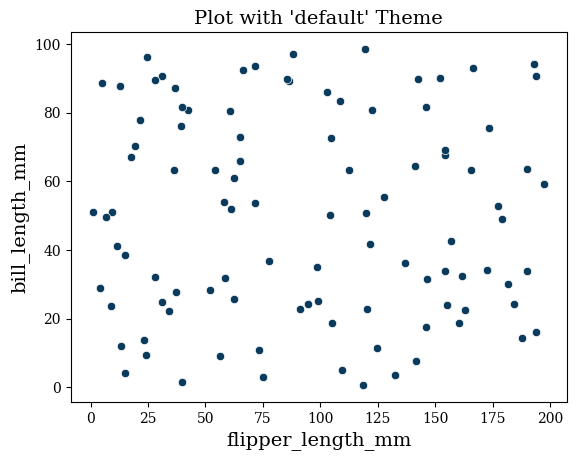

In [7]:
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm")
plt.title("Plot with 'default' Theme")
plt.show()

## Use project color palette

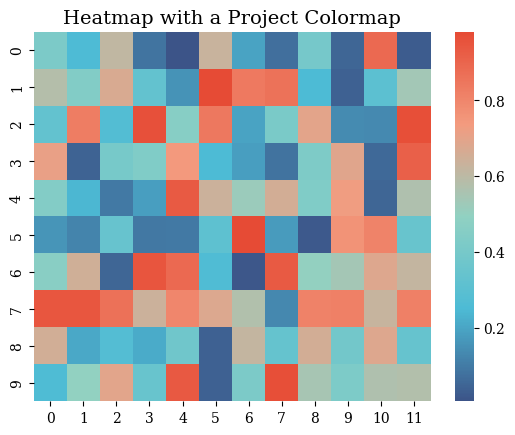

In [8]:
data = np.random.rand(10, 12)

# Use a custom continuous colormap
sns.heatmap(data, cmap="project_npg_continuous")
plt.title("Heatmap with a Project Colormap")
plt.show()

## Load and use one of the project palettes

/tmp/ipykernel_4133201/4211486456.py:1: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(


<Axes: xlabel='flipper_length_mm', ylabel='bill_length_mm'>

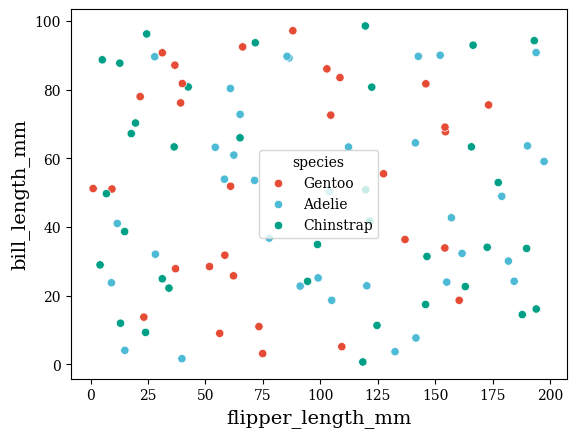

In [10]:
# Use a discrete palette composed by a sequence of colors
sns.scatterplot(
    data=penguins, 
    x="flipper_length_mm", 
    y="bill_length_mm", 
    hue="species", palette=scp.get_palette("npg")
)

## Use a named palette for precise label-color mapping

In [14]:
# Load a custom palette
scp.load_project_palettes("example_palette.yaml")

Successfully loaded palettes from: example_palette.yaml


<Axes: xlabel='flipper_length_mm', ylabel='bill_length_mm'>

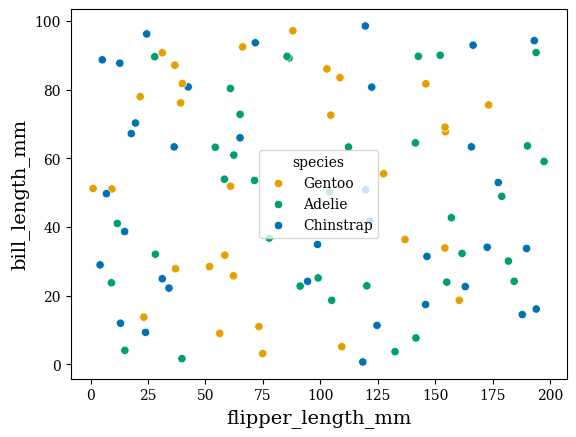

In [15]:
# Get the mapped palette and apply it
sns.scatterplot(
    data=penguins, 
    x="flipper_length_mm", 
    y="bill_length_mm", 
    hue="species", palette=scp.get_palette("species")
)

## Load a custom config from GitHub

In [6]:
# You can load palettes or themes from a private GitHub repository providing your token as github_pat argument

# GITHUB_TOKEN = os.environ['GITHUB_TOKEN']
# scp.load_project_palettes(
#    "https://raw.githubusercontent.com/your/private/repo/palettes.yaml",
#    github_pat=GITHUB_TOKEN)

In [7]:
# When loading a theme that requires to download some fonts an additional token can be provided for font access
# This is passed with github_pat_fonts arguments
# When github_pat_fonts is None and github_pat is set the github_pat is used to access both YAML file and font files
# If you want to avoid this you can set github_pat_fonts explicitly to "none"

# Option 1 github_pat token is used to access both YAML file and font files
# GITHUB_TOKEN = os.environ['GITHUB_TOKEN']
# scp.load_project_themes(
#    "https://raw.githubusercontent.com/your/private/repo/palettes.yaml",
#    github_pat=GITHUB_TOKEN)

# Option 2 we use 2 different token to access both YAML file and font files
# GITHUB_TOKEN = os.environ['GITHUB_TOKEN']
# GITHUB_TOKEN_FONTS = os.environ['GITHUB_TOKEN_FONTS']
# scp.load_project_themes(
#    "https://raw.githubusercontent.com/your/private/repo/palettes.yaml",
#    github_pat=GITHUB_TOKEN, github_pat_fonts=GITHUB_TOKEN_FONTS)

# Option 3 we need a token to access the YAML file, but font file are publicly available font files
# GITHUB_TOKEN = os.environ['GITHUB_TOKEN']
# GITHUB_TOKEN_FONTS = os.environ['GITHUB_TOKEN_FONTS']
# scp.load_project_themes(
#    "https://raw.githubusercontent.com/your/private/repo/palettes.yaml",
#    github_pat=GITHUB_TOKEN, github_pat_fonts="none")

In [10]:
# Load from a public repository
scp.load_project_palettes(
    'https://raw.githubusercontent.com/HTGenomeAnalysisUnit/project_styler_py/refs/heads/main/example/example_palette.yaml'
)
scp.load_project_themes(
    'https://raw.githubusercontent.com/HTGenomeAnalysisUnit/project_styler_py/refs/heads/main/example/example_theme.yaml'
)

Successfully loaded palettes from: https://raw.githubusercontent.com/HTGenomeAnalysisUnit/project_styler_py/refs/heads/main/example/example_palette.yaml
Successfully loaded themes from: https://raw.githubusercontent.com/HTGenomeAnalysisUnit/project_styler_py/refs/heads/main/example/example_theme.yaml
Loading fonts for theme: font_theme
Font saved to temporary file: /tmp/tmphvozuzlo.ttf
Font saved to temporary file: /tmp/tmpzbl9fyjk.ttf


In [11]:
print(scp.available_palettes())

species, npg, celltypes


In [12]:
print(scp.available_themes())

publication, font_theme


In [15]:
scp.set_project_style("font_theme", **{'axes.labelsize': 14})

Project style 'font_theme' applied. Continuous colormaps registered.


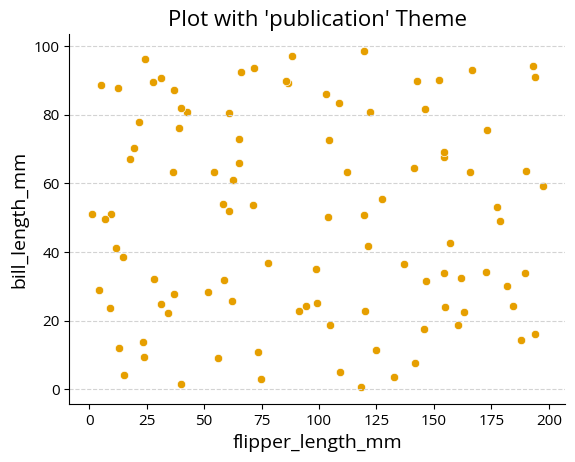

In [16]:
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm")
plt.title("Plot with 'publication' Theme")
plt.show()

In [27]:
import scanpy as sc
import anndata as ad

n_cells = 10000
n_genes = 1000

# Create a dummy adata as example
n_counts = int(0.1 * n_cells * n_genes)  # Approximately 10% non-zero values
counts = np.zeros((n_cells, n_genes), dtype=np.float32)
rows = np.random.randint(0, n_cells, n_counts)
cols = np.random.randint(0, n_genes, n_counts)
counts[rows, cols] = np.random.poisson(lam=5, size=n_counts)

obs = pd.DataFrame({
    'group': np.random.choice(['Group1', 'Group2', 'Group3'], size=n_cells),
    'celltype': np.random.choice(['B', 'CD4_T', 'CD8_T', 'DC'], size=n_cells),
    'celltype_2': np.random.choice(['B', 'CD4_T', 'CD8_T', 'DC', 'dummy'], size=n_cells)
}, index=[f'cell_{i}' for i in range(n_cells)])

var = pd.DataFrame(index=[f'gene_{j}' for j in range(n_genes)])

adata = ad.AnnData(X=counts, obs=obs, var=var)
adata.obsm['X_umap'] = np.random.uniform(low=-10, high=10, size=(adata.n_obs, 2))

In [28]:
adata

AnnData object with n_obs × n_vars = 10000 × 1000
    obs: 'group', 'celltype', 'celltype_2'
    obsm: 'X_umap'

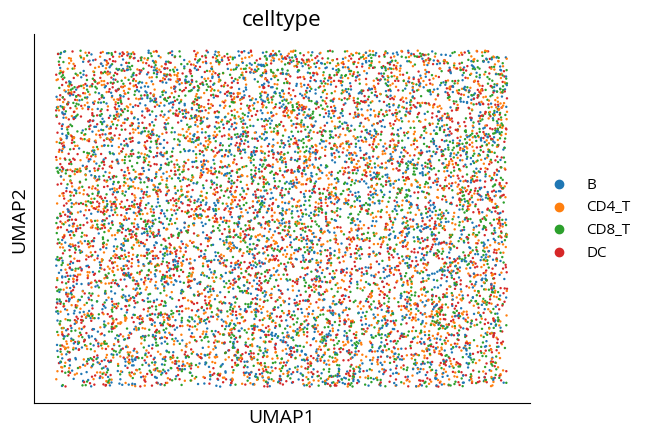

In [30]:
# Umap colored by celltype using the mapped palette. Here the palette keys match the celltype labels exactly
umap_palette = scp.get_mapped_palette('celltypes')
sc.pl.umap(adata, color=['celltype'], palette = umap_palette)

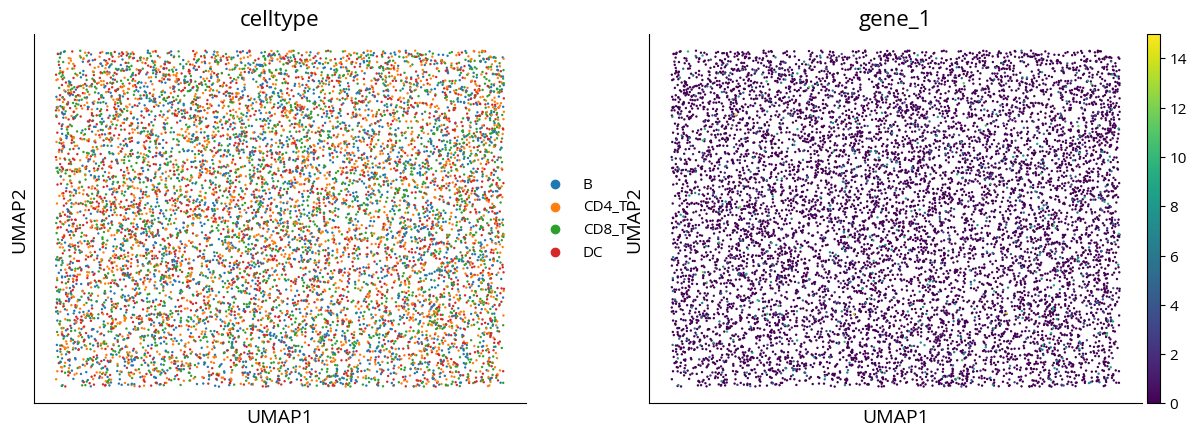

In [32]:
# The mapped palette can be used with additional continous variables
sc.pl.umap(adata, color=['celltype', 'gene_1'], palette = umap_palette)

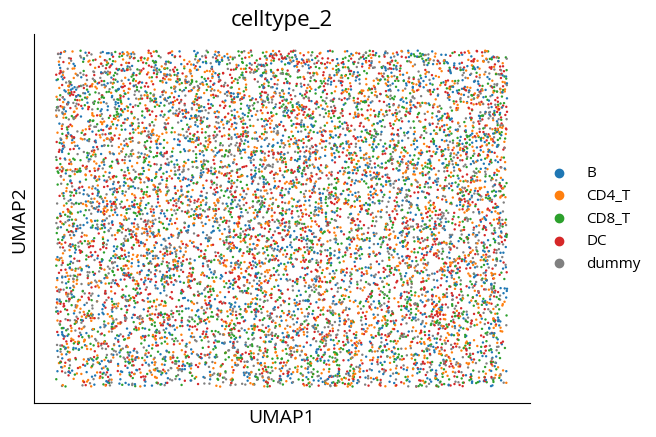

In [35]:
# If you apply custom mapped palette to a variable that contains labels not seen in the palette keys you get an error
# You can fix this using get_mapped_palette and setting data labels
# Now the additional labels are plotted in grey (you can change this by settings also unseen_color)
umap_palette = scp.get_mapped_palette('celltypes', adata.obs['celltype_2'])
sc.pl.umap(adata, color=['celltype_2'], palette = umap_palette)

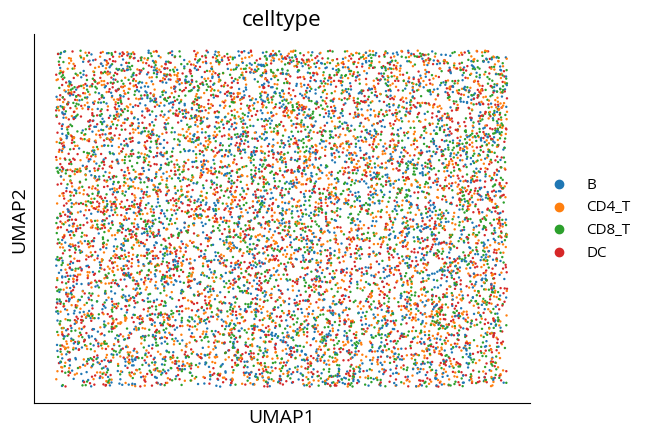

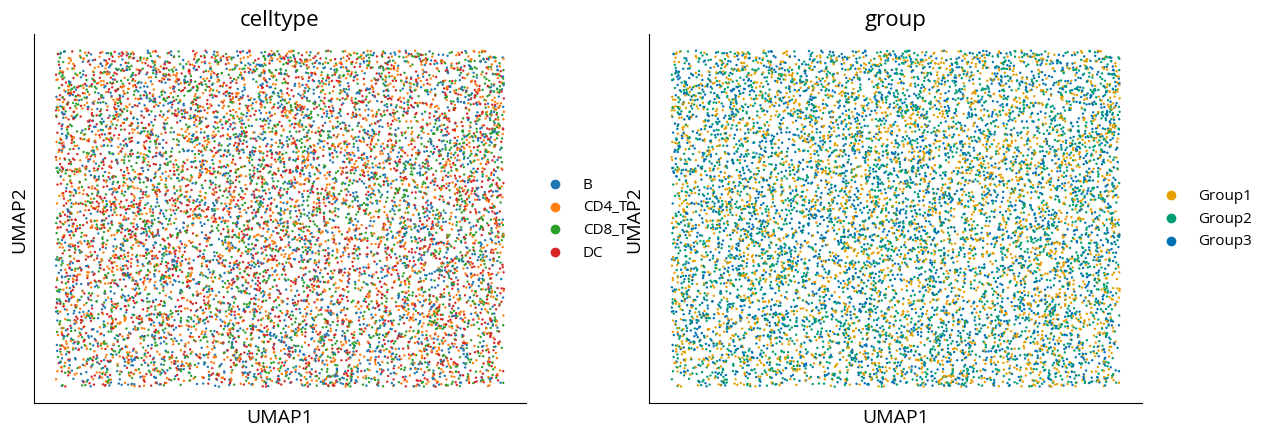

In [33]:
# If you want to plot multiple categorical variables where only one need the custom palette
sc.pl.umap(adata, color='celltype', palette = umap_palette)
sc.pl.umap(adata, color=['celltype','group'])
plt.show()